In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
data = pd.read_csv('train.csv')
print('Primeras filas del dataset')
print(data.head())
# Ver el tamaño del dataset
print('Tamaño del dataset')
print(data.shape)

# Obtener información sobre los tipos de datos
print('Tipos de datos')
print(data.info())

# Describir las variables numéricas
print('Descripción de las variables numéricas')
print(data.describe())


Primeras filas del dataset
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePr

In [184]:
#lotarea,neighborhood, overallqual, overallcond, yearbuilt, yearremodadd, grlivarea,garagecars,yr sold, saleprice
important_columns = ['LotArea','Neighborhood','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GrLivArea','GarageCars','YrSold','SalePrice']
print(data[important_columns].head())

# Obtener información sobre los tipos de datos
print('Información sobre los tipos de datos')
print(data[important_columns].info())

#Describir las variables numéricas
print('Describe variables numericas')
print(data[important_columns].describe())
#Proporcion de valores nulos
print('Proporcion de valores nulos')
print(data.isnull().sum()/data.shape[0])

   LotArea Neighborhood  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     8450      CollgCr            7            5       2003          2003   
1     9600      Veenker            6            8       1976          1976   
2    11250      CollgCr            7            5       2001          2002   
3     9550      Crawfor            7            5       1915          1970   
4    14260      NoRidge            8            5       2000          2000   

   GrLivArea  GarageCars  YrSold  SalePrice  
0       1710           2    2008     208500  
1       1262           2    2007     181500  
2       1786           2    2008     223500  
3       1717           3    2006     140000  
4       2198           3    2008     250000  
Información sobre los tipos de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non

In [185]:
missing_values = data[important_columns].isnull().sum()
print(missing_values[missing_values >= 0])
print('Las columnas no tienen valores nulos')

LotArea         0
Neighborhood    0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
GrLivArea       0
GarageCars      0
YrSold          0
SalePrice       0
dtype: int64
Las columnas no tienen valores nulos


In [186]:
print('Las columnas que se eligieron no tienen valores faltantes')

Las columnas que se eligieron no tienen valores faltantes


Distribución de la variable SalePrice


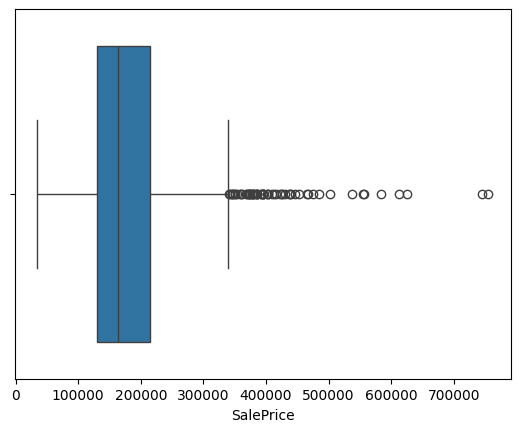

In [187]:
print('Distribución de la variable SalePrice')
sns.boxplot(x=data[important_columns]['SalePrice'])
plt.show()

Distribución de la variable LotArea


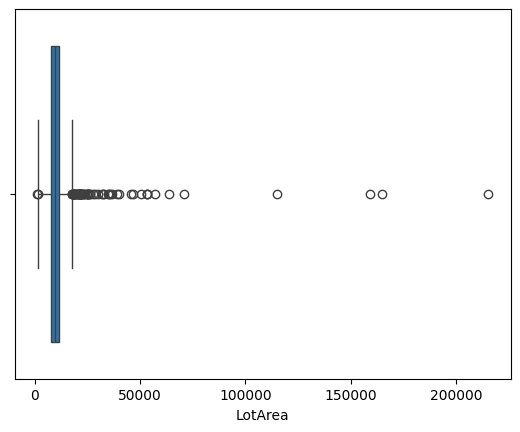

In [188]:
print('Distribución de la variable LotArea')
sns.boxplot(x=data[important_columns]['LotArea'])
plt.show()

Distribución de la variable OverallQual


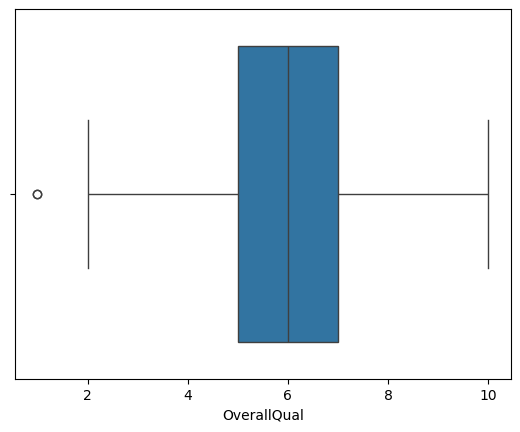

In [189]:
print('Distribución de la variable OverallQual')
sns.boxplot(x=data['OverallQual'])
plt.show()

Distribución de la variable OverallCondition


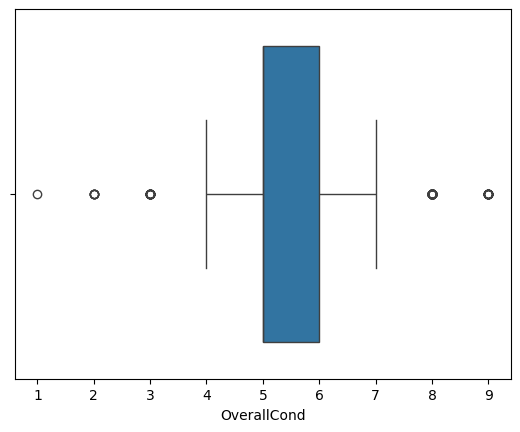

In [190]:
#OverallCond     0

print('Distribución de la variable OverallCondition')
sns.boxplot(x=data['OverallCond'])
plt.show()

Distribución de la variable YearBuilt


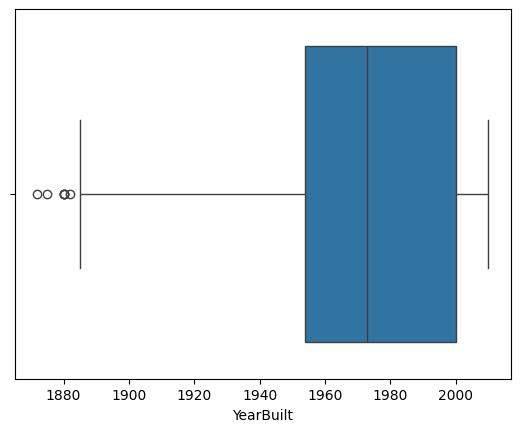

In [191]:
#YearBuilt       0

print('Distribución de la variable YearBuilt')
sns.boxplot(x=data['YearBuilt'])
plt.show()

Distribución de la variable YearRemodAdd


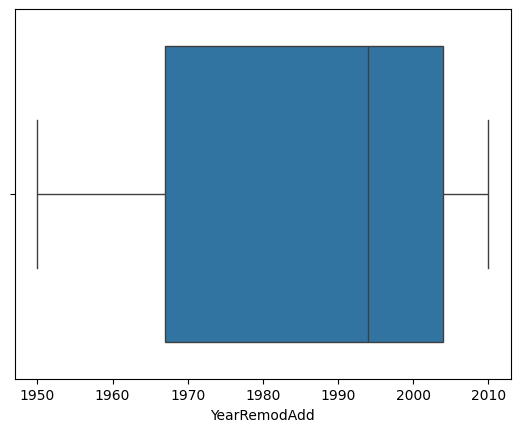

In [192]:
#YearRemodAdd    0
print('Distribución de la variable YearRemodAdd')
sns.boxplot(x=data['YearRemodAdd'])
plt.show()

Distribución de la variable GrLivArea


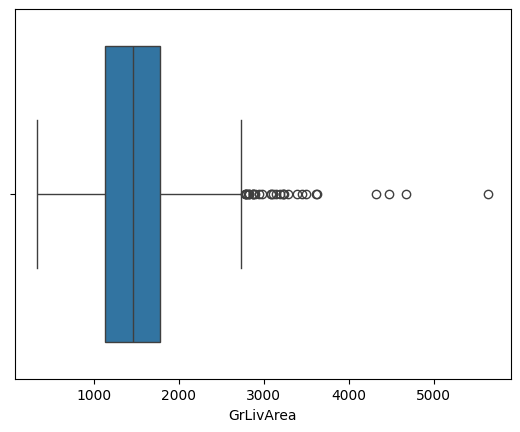

In [193]:
#GrLivArea       0

print('Distribución de la variable GrLivArea')
sns.boxplot(x=data['GrLivArea'])
plt.show()

Distribución de la variable GarageCars


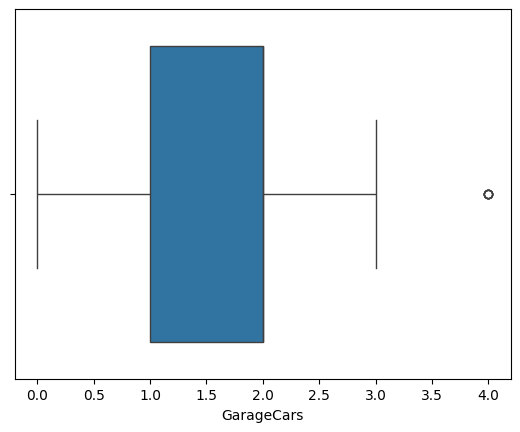

In [194]:
#GarageCars      0

print('Distribución de la variable GarageCars')
sns.boxplot(x=data['GarageCars'])
plt.show()

Distribución de la variable YrSold


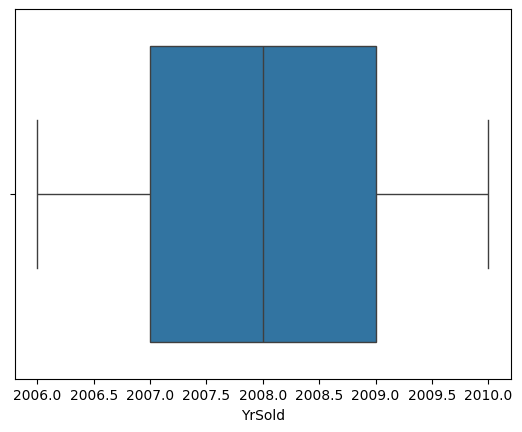

In [195]:
#YrSold          0

print('Distribución de la variable YrSold')
sns.boxplot(x=data['YrSold'])
plt.show()

In [196]:
from scipy import stats

# Filtrar y conservar los valores sin outliers basados en Z-score
data['SalePrice_SO'] = data['SalePrice'][(np.abs(stats.zscore(data['SalePrice'])) < 3)]
data['LotArea_SO'] = data['LotArea'][(np.abs(stats.zscore(data['LotArea'])) < 5)]
data['OverallQual_SO'] = data['OverallQual'][(np.abs(stats.zscore(data['OverallQual'])) < 3)]
data['OverallCond_SO'] = data['OverallCond'][(np.abs(stats.zscore(data['OverallCond'])) < 5)]
data['YearBuilt_SO'] = data['YearBuilt'][(np.abs(stats.zscore(data['YearBuilt'])) < 3)]
data['YearRemodAdd_SO'] = data['YearRemodAdd'][(np.abs(stats.zscore(data['YearRemodAdd'])) < 3)]
data['GrLivArea_SO'] = data['GrLivArea'][(np.abs(stats.zscore(data['GrLivArea'])) < 3)]
data['GarageCars_SO'] = data['GarageCars'][(np.abs(stats.zscore(data['GarageCars'])) < 3)]
data['YrSold_SO'] = data['YrSold'][(np.abs(stats.zscore(data['YrSold'])) < 3)]



Distribución de la variable SalePrice


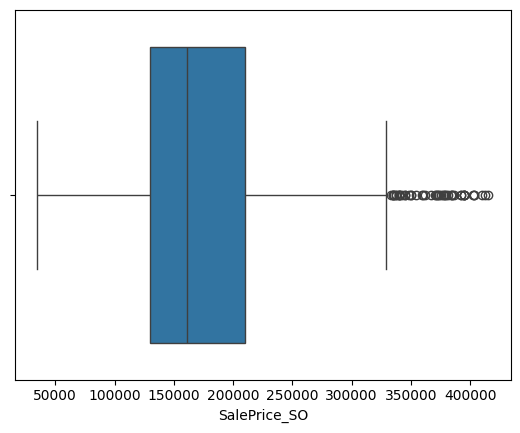

Distribución de la variable LotArea


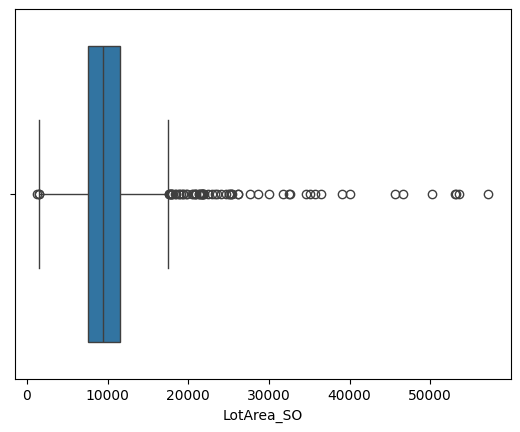

Distribución de la variable OverallQual


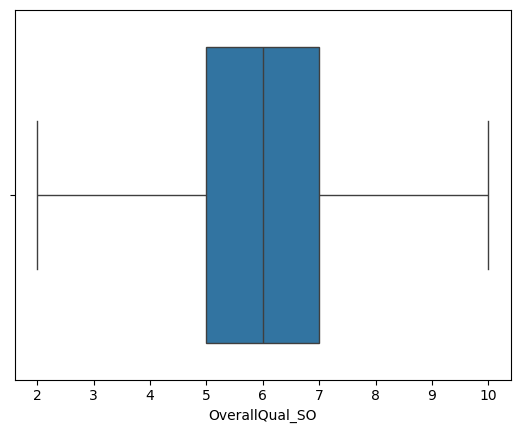

Distribución de la variable OverallCondition


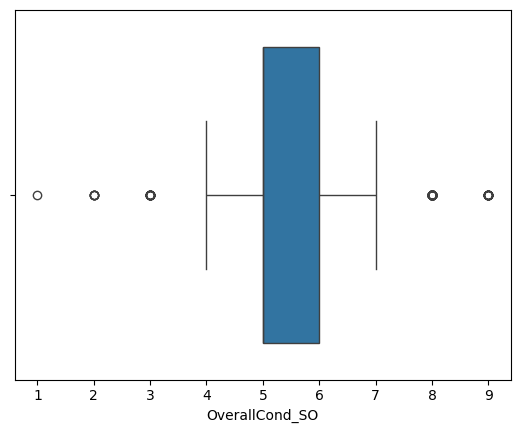

Distribución de la variable YearBuilt


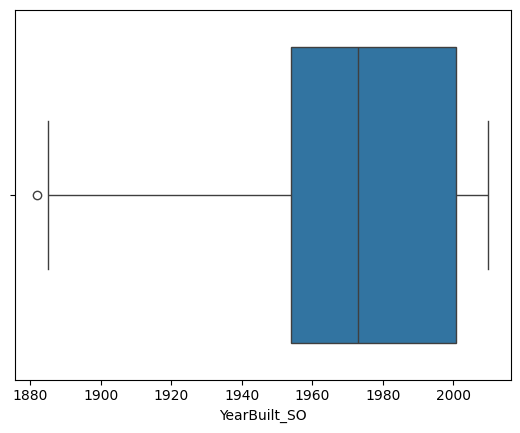

Distribución de la variable YearRemodAdd


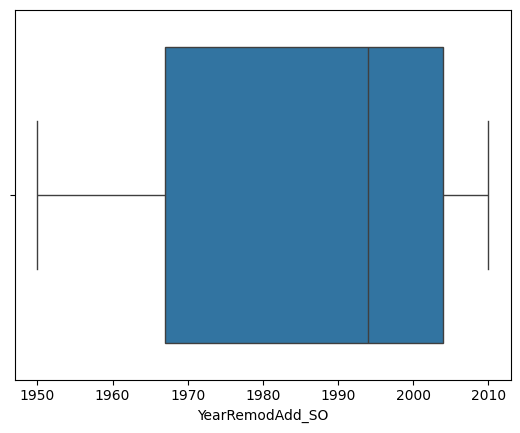

Distribución de la variable GrLivArea


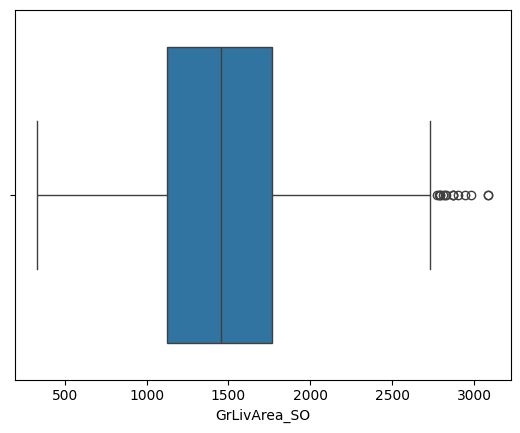

Distribución de la variable GarageCars


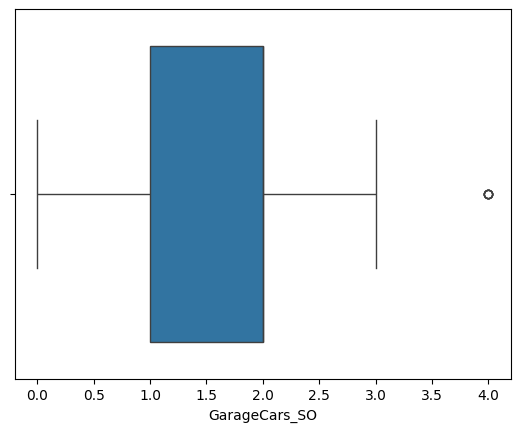

Distribución de la variable YrSold


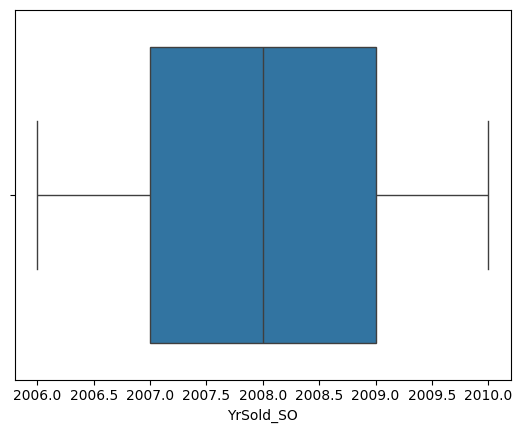

In [197]:
print('Distribución de la variable SalePrice')
sns.boxplot(x=data['SalePrice_SO'])
plt.show()

print('Distribución de la variable LotArea')
sns.boxplot(x=data['LotArea_SO'])
plt.show()

print('Distribución de la variable OverallQual')
sns.boxplot(x=data['OverallQual_SO'])
plt.show()

print('Distribución de la variable OverallCondition')
sns.boxplot(x=data['OverallCond_SO'])
plt.show()

print('Distribución de la variable YearBuilt')
sns.boxplot(x=data['YearBuilt_SO'])
plt.show()

print('Distribución de la variable YearRemodAdd')
sns.boxplot(x=data['YearRemodAdd_SO'])
plt.show()

print('Distribución de la variable GrLivArea')
sns.boxplot(x=data['GrLivArea_SO'])
plt.show()

print('Distribución de la variable GarageCars')
sns.boxplot(x=data['GarageCars_SO'])
plt.show()

print('Distribución de la variable YrSold')
sns.boxplot(x=data['YrSold_SO'])
plt.show()

In [198]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#lotarea,neighborhood, overallqual, overallcond, yearbuilt, yearremodadd, grlivarea,garagecars,yr sold, saleprice

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

data['SalePrice_scaled'] = scaler.fit_transform(data[['SalePrice']])
data['SalePrice_normalized'] = min_max_scaler.fit_transform(data[['SalePrice']])
print(data[['SalePrice', 'SalePrice_scaled', 'SalePrice_normalized']].head())

data['LotArea_scaled'] = scaler.fit_transform(data[['LotArea']])
data['LotArea_normalized'] = min_max_scaler.fit_transform(data[['LotArea']])
print(data[['LotArea', 'LotArea_scaled', 'LotArea_normalized']].head())

data['OverallQual_scaled'] = scaler.fit_transform(data[['OverallQual']])
data['OverallQual_normalized'] = min_max_scaler.fit_transform(data[['OverallQual']])
print(data[['OverallQual', 'OverallQual_scaled', 'OverallQual_normalized']].head())

data['OverallCond_scaled'] = scaler.fit_transform(data[['OverallCond']])
data['OverallCond_normalized'] = min_max_scaler.fit_transform(data[['OverallCond']])
print(data[['OverallCond', 'OverallCond_scaled', 'OverallCond_normalized']].head())

data['YearBuilt_scaled'] = scaler.fit_transform(data[['YearBuilt']])
data['YearBuilt_normalized'] = min_max_scaler.fit_transform(data[['YearBuilt']])
print(data[['YearBuilt', 'YearBuilt_scaled', 'YearBuilt_normalized']].head())

data['YearRemodAdd_scaled'] = scaler.fit_transform(data[['YearRemodAdd']])
data['YearRemodAdd_normalized'] = min_max_scaler.fit_transform(data[['YearRemodAdd']])
print(data[['YearRemodAdd', 'YearRemodAdd_scaled', 'YearRemodAdd_normalized']].head())

data['GrLivArea_scaled'] = scaler.fit_transform(data[['GrLivArea']])
data['GrLivArea_normalized'] = min_max_scaler.fit_transform(data[['GrLivArea']])
print(data[['GrLivArea', 'GrLivArea_scaled', 'GrLivArea_normalized']].head())

data['GarageCars_scaled'] = scaler.fit_transform(data[['GarageCars']])
data['GarageCars_normalized'] = min_max_scaler.fit_transform(data[['GarageCars']])
print(data[['GarageCars', 'GarageCars_scaled', 'GarageCars_normalized']].head())

data['YrSold_scaled'] = scaler.fit_transform(data[['YrSold']])
data['YrSold_normalized'] = min_max_scaler.fit_transform(data[['YrSold']])
print(data[['YrSold', 'YrSold_scaled', 'YrSold_normalized']].head())



   SalePrice  SalePrice_scaled  SalePrice_normalized
0     208500          0.347273              0.241078
1     181500          0.007288              0.203583
2     223500          0.536154              0.261908
3     140000         -0.515281              0.145952
4     250000          0.869843              0.298709
   LotArea  LotArea_scaled  LotArea_normalized
0     8450       -0.207142            0.033420
1     9600       -0.091886            0.038795
2    11250        0.073480            0.046507
3     9550       -0.096897            0.038561
4    14260        0.375148            0.060576
   OverallQual  OverallQual_scaled  OverallQual_normalized
0            7            0.651479                0.666667
1            6           -0.071836                0.555556
2            7            0.651479                0.666667
3            7            0.651479                0.666667
4            8            1.374795                0.777778
   OverallCond  OverallCond_scaled  OverallCon

In [230]:
print('Normalización es buena cuando las variables tienen diferentes escalas y no siguen una distribución normal. \nEstandarización es preferible cuando los datos siguen una distribución normal y se usan algoritmos que se benefician de la simetría y la homogeneidad de las variables.')

Normalización es buena cuando las variables tienen diferentes escalas y no siguen una distribución normal. 
Estandarización es preferible cuando los datos siguen una distribución normal y se usan algoritmos que se benefician de la simetría y la homogeneidad de las variables.


In [200]:
#lotarea,neighborhood, overallqual, overallcond, yearbuilt, yearremodadd, grlivarea,garagecars,yr sold, saleprice

skewnessSale = stats.skew(data['SalePrice_normalized'])
print('Skewness SalePrice:', skewnessSale)

skewnessLot = stats.skew(data['LotArea_normalized'])
print('Skewness LotArea:', skewnessLot)

skewnessQual = stats.skew(data['OverallQual_normalized'])
print('Skewness OverallQual:', skewnessQual)

skewnessCond = stats.skew(data['OverallCond_normalized'])
print('Skewness OverallCond:', skewnessCond)

skewnessBuilt = stats.skew(data['YearBuilt_normalized'])
print('Skewness YearBuilt:', skewnessBuilt)

skewnessRemod = stats.skew(data['YearRemodAdd_normalized'])
print('Skewness YearRemodAdd:', skewnessRemod)

skewnessGrLiv = stats.skew(data['GrLivArea_normalized'])
print('Skewness GrLivArea:', skewnessGrLiv)

skewnessGarage = stats.skew(data['GarageCars_normalized'])
print('Skewness GarageCars:', skewnessGarage)

skewnessSold = stats.skew(data['YrSold_normalized'])
print('Skewness YrSold:', skewnessSold)


Skewness SalePrice: 1.8809407460340357
Skewness LotArea: 12.195142125084478
Skewness OverallQual: 0.2167209765258635
Skewness OverallCond: 0.6923552135520978
Skewness YearBuilt: -0.6128307242029024
Skewness YearRemodAdd: -0.5030444967598083
Skewness GrLivArea: 1.3651559547734349
Skewness GarageCars: -0.34219689543081294
Skewness YrSold: 0.09616957961803625


   SalePrice  SalePrice_log
0     208500      12.247699
1     181500      12.109016
2     223500      12.317171
3     140000      11.849405
4     250000      12.429220


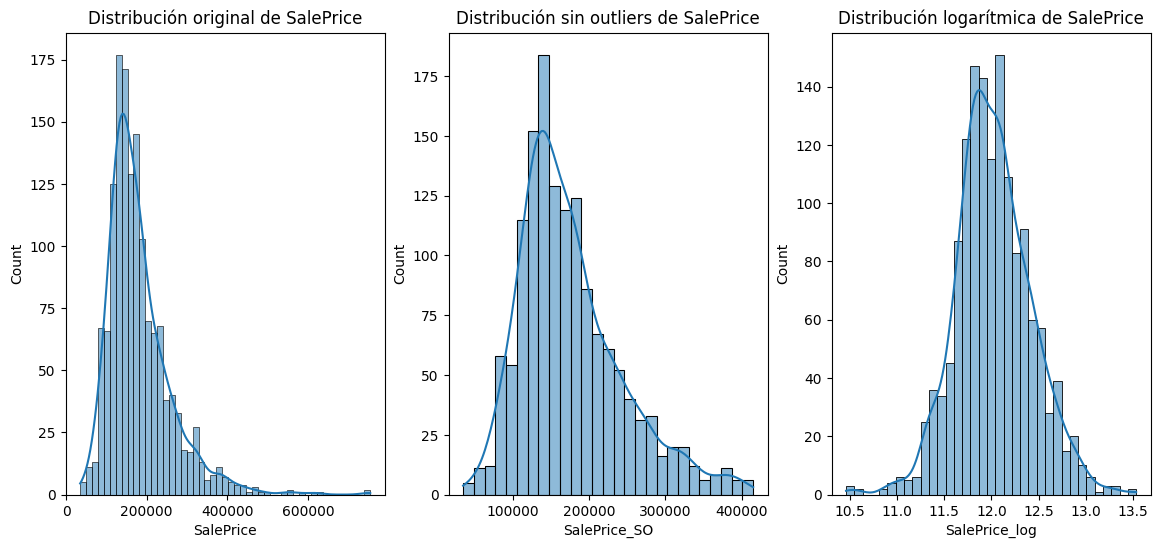

Skewness de SalePrice después de la transformación: 0.12122191311528363


In [201]:
# Aplicar la transformación logarítmica a la columna 'SalePrice'
data['SalePrice_log'] = np.log1p(data['SalePrice'])  # log1p para manejar ceros

# Verificar que la transformación se haya aplicado correctamente
print(data[['SalePrice', 'SalePrice_SO', 'SalePrice_log']].head())

# Graficar la distribución antes y después de la transformación
def plot_distribution(original, no_outliers ,transformed, column):
    plt.figure(figsize=(14, 6))

    # Gráfico de la variable original
    plt.subplot(1, 3, 1)
    sns.histplot(original, kde=True)
    plt.title(f'Distribución original de {column}')

    #Gráfico de la variable sin outliers
    plt.subplot(1, 3, 2)
    sns.histplot(no_outliers, kde=True)
    plt.title(f'Distribución sin outliers de {column}')


    # Gráfico de la variable transformada
    plt.subplot(1, 3, 3)
    sns.histplot(transformed, kde=True)
    plt.title(f'Distribución logarítmica de {column}')
    
    plt.show()

# Mostrar el gráfico para 'SalePrice'
plot_distribution(data['SalePrice'], data['SalePrice_SO'], data['SalePrice_log'], 'SalePrice')



# Evaluar el skewness después de la transformación
skewness_log = stats.skew(data['SalePrice_log'].dropna())
print(f'Skewness de SalePrice después de la transformación: {skewness_log}')

   LotArea  LotArea_log
0     8450     9.042040
1     9600     9.169623
2    11250     9.328212
3     9550     9.164401
4    14260     9.565284


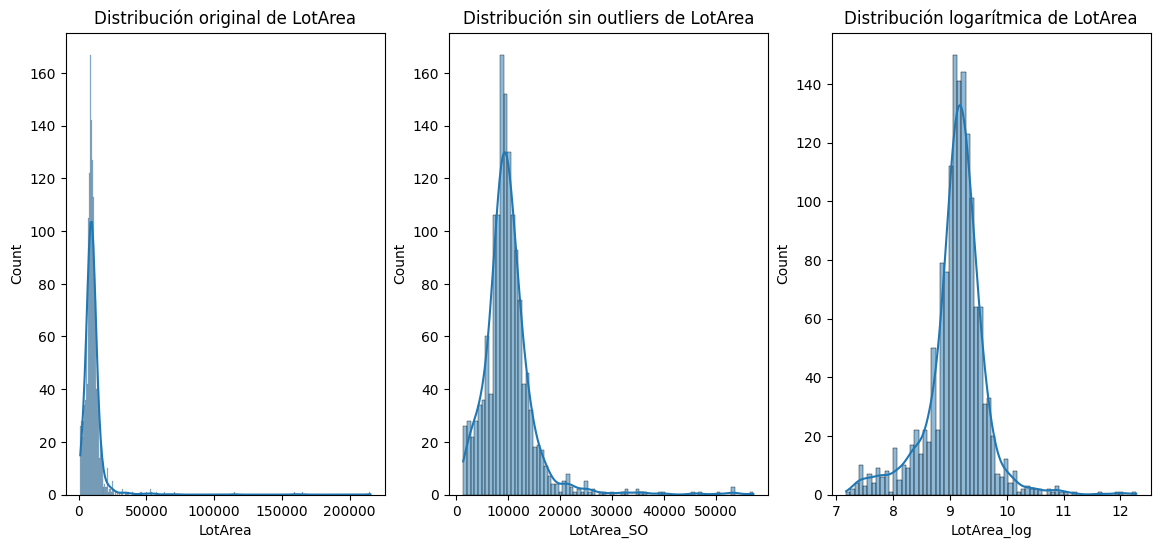

Skewness de LotArea después de la transformación: -0.13726327193353463


In [202]:
# Aplicar la transformación logarítmica a la columna 'LoArea'
data['LotArea_log'] = np.log1p(data['LotArea'])  # log1p para manejar ceros

# Verificar que la transformación se haya aplicado correctamente
print(data[['LotArea', 'LotArea_SO', 'LotArea_log']].head())

# Graficar la distribución antes y después de la transformación
def plot_distribution(original, no_outliers ,transformed, column):
    plt.figure(figsize=(14, 6))

    # Gráfico de la variable original
    plt.subplot(1, 3, 1)
    sns.histplot(original, kde=True)
    plt.title(f'Distribución original de {column}')

    #Gráfico de la variable sin outliers
    plt.subplot(1, 3, 2)
    sns.histplot(no_outliers, kde=True)
    plt.title(f'Distribución sin outliers de {column}')


    # Gráfico de la variable transformada
    plt.subplot(1, 3, 3)
    sns.histplot(transformed, kde=True)
    plt.title(f'Distribución logarítmica de {column}')
    
    plt.show()

# Mostrar el gráfico para 'LotArea'
plot_distribution(data['LotArea'], data['LotArea_SO'], data['LotArea_log'], 'LotArea')



# Evaluar el skewness después de la transformación
skewness_log = stats.skew(data['LotArea_log'].dropna())
print(f'Skewness de LotArea después de la transformación: {skewness_log}')

   GrLivArea  GrLivArea_log
0       1710       7.444833
1       1262       7.141245
2       1786       7.488294
3       1717       7.448916
4       2198       7.695758


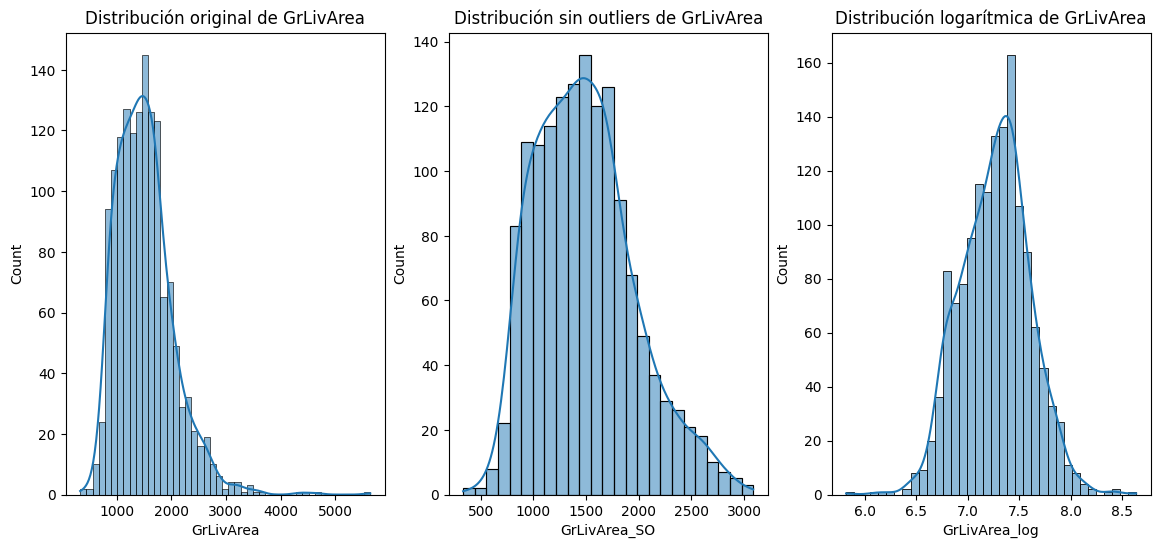

Skewness de GrLivArea después de la transformación: -0.006133943205449232


In [203]:
# Aplicar la transformación logarítmica a la columna 'GrLivArea'
data['GrLivArea_log'] = np.log1p(data['GrLivArea'])  # log1p para manejar ceros

# Verificar que la transformación se haya aplicado correctamente
print(data[['GrLivArea', 'GrLivArea_SO','GrLivArea_log']].head())

# Graficar la distribución antes y después de la transformación
def plot_distribution(original, no_outliers ,transformed, column):
    plt.figure(figsize=(14, 6))

    # Gráfico de la variable original
    plt.subplot(1, 3, 1)
    sns.histplot(original, kde=True)
    plt.title(f'Distribución original de {column}')

    #Gráfico de la variable sin outliers
    plt.subplot(1, 3, 2)
    sns.histplot(no_outliers, kde=True)
    plt.title(f'Distribución sin outliers de {column}')


    # Gráfico de la variable transformada
    plt.subplot(1, 3, 3)
    sns.histplot(transformed, kde=True)
    plt.title(f'Distribución logarítmica de {column}')
    
    plt.show()

# Mostrar el gráfico para 'GrLivArea'
plot_distribution(data['GrLivArea'], data['GrLivArea_SO'], data['GrLivArea_log'], 'GrLivArea')



# Evaluar el skewness después de la transformación
skewness_log = stats.skew(data['GrLivArea_log'].dropna())
print(f'Skewness de GrLivArea después de la transformación: {skewness_log}')

   OverallCond  OverallCond_log
0            5         1.791759
1            8         2.197225
2            5         1.791759
3            5         1.791759
4            5         1.791759


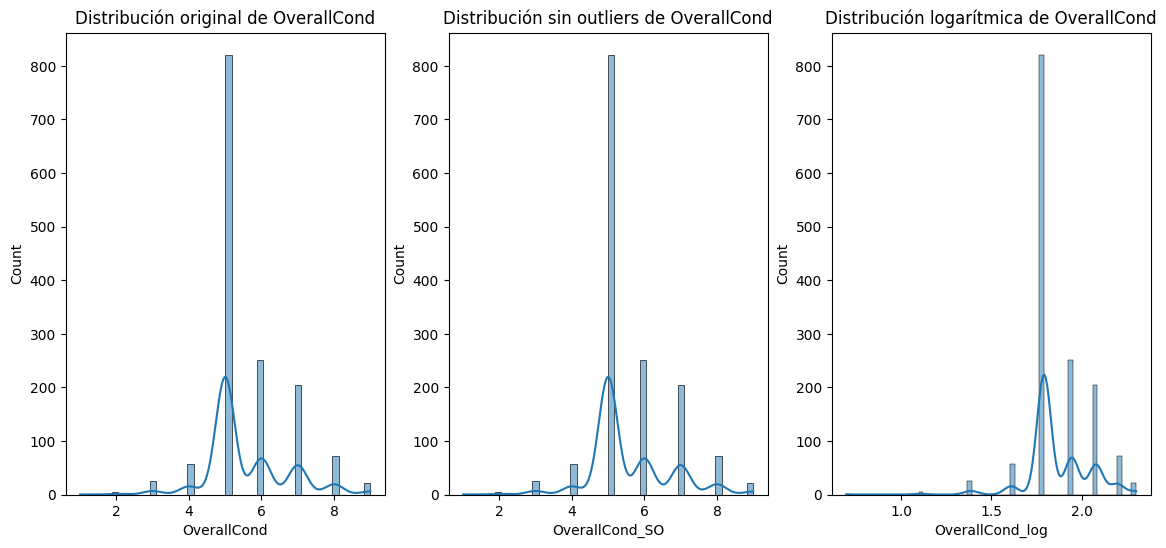

Skewness de OverallCond después de la transformación: -0.2537543400342619


In [204]:
# Aplicar la transformación logarítmica a la columna 'OverallCond'
data['OverallCond_log'] = np.log1p(data['OverallCond'])  # log1p para manejar ceros

# Verificar que la transformación se haya aplicado correctamente
print(data[['OverallCond', 'OverallCond_SO','OverallCond_log']].head())

# Graficar la distribución antes y después de la transformación
def plot_distribution(original, no_outliers ,transformed, column):
    plt.figure(figsize=(14, 6))

    # Gráfico de la variable original
    plt.subplot(1, 3, 1)
    sns.histplot(original, kde=True)
    plt.title(f'Distribución original de {column}')

    #Gráfico de la variable sin outliers
    plt.subplot(1, 3, 2)
    sns.histplot(no_outliers, kde=True)
    plt.title(f'Distribución sin outliers de {column}')


    # Gráfico de la variable transformada
    plt.subplot(1, 3, 3)
    sns.histplot(transformed, kde=True)
    plt.title(f'Distribución logarítmica de {column}')
    
    plt.show()

# Mostrar el gráfico para 'SalePrice'
plot_distribution(data['OverallCond'], data['OverallCond_SO'], data['OverallCond_log'], 'OverallCond')



# Evaluar el skewness después de la transformación
skewness_log = stats.skew(data['OverallCond_log'].dropna())
print(f'Skewness de OverallCond después de la transformación: {skewness_log}')

   YearBuilt  YearBuilt_log
0       2003       7.602900
1       1976       7.589336
2       2001       7.601902
3       1915       7.557995
4       2000       7.601402


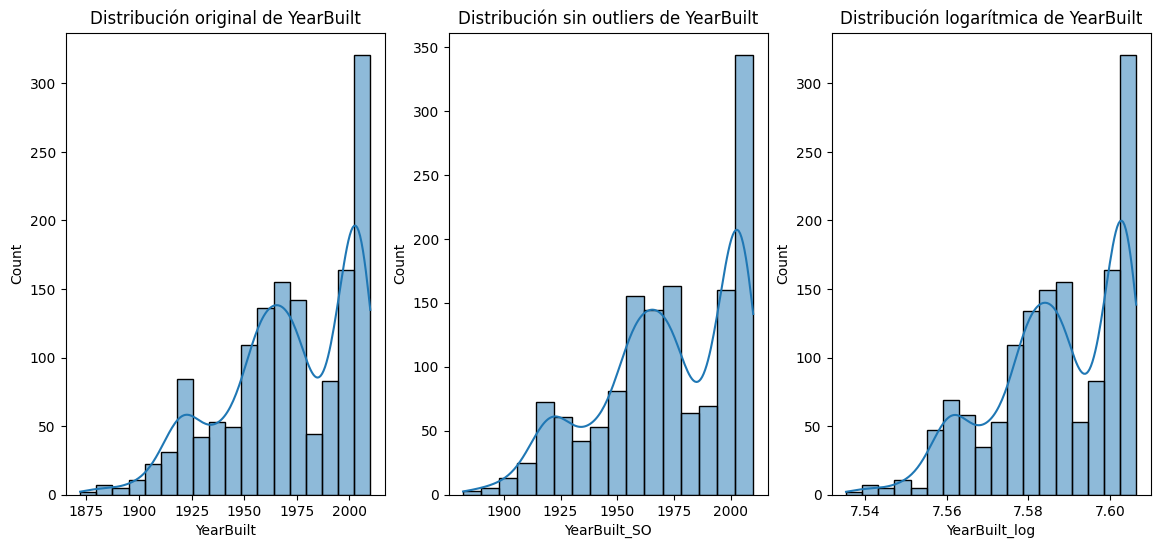

Skewness de YearBuilt después de la transformación: -0.6404704826537456


In [205]:
# Aplicar la transformación logarítmica a la columna 'YearBuilt'
data['YearBuilt_log'] = np.log1p(data['YearBuilt'])  # log1p para manejar ceros

# Verificar que la transformación se haya aplicado correctamente
print(data[['YearBuilt', 'YearBuilt_SO','YearBuilt_log']].head())

# Graficar la distribución antes y después de la transformación
def plot_distribution(original, no_outliers ,transformed, column):
    plt.figure(figsize=(14, 6))

    # Gráfico de la variable original
    plt.subplot(1, 3, 1)
    sns.histplot(original, kde=True)
    plt.title(f'Distribución original de {column}')

    #Gráfico de la variable sin outliers
    plt.subplot(1, 3, 2)
    sns.histplot(no_outliers, kde=True)
    plt.title(f'Distribución sin outliers de {column}')


    # Gráfico de la variable transformada
    plt.subplot(1, 3, 3)
    sns.histplot(transformed, kde=True)
    plt.title(f'Distribución logarítmica de {column}')
    
    plt.show()

# Mostrar el gráfico para 'YearBuilt'
plot_distribution(data['YearBuilt'], data['YearBuilt_SO'], data['YearBuilt_log'], 'YearBuilt')



# Evaluar el skewness después de la transformación
skewness_log = stats.skew(data['YearBuilt_log'].dropna())
print(f'Skewness de YearBuilt después de la transformación: {skewness_log}')

In [207]:
#creacion de columna nueva 
data['Price_per_Unit'] = data['SalePrice'] / data['LotArea']

# Verificar que la columna se haya creado correctamente
print(data[['SalePrice', 'LotArea', 'Price_per_Unit']].head())

#grlivarea,garagecars
data['GrLivArea_per_Car'] = data['GrLivArea_SO'] / data['GarageCars_SO']
print(data[['GrLivArea_SO', 'GarageCars_SO', 'GrLivArea_per_Car']].head())

   SalePrice  LotArea  Price_per_Unit
0     208500     8450       24.674556
1     181500     9600       18.906250
2     223500    11250       19.866667
3     140000     9550       14.659686
4     250000    14260       17.531557
   GrLivArea_SO  GarageCars_SO  GrLivArea_per_Car
0        1710.0              2         855.000000
1        1262.0              2         631.000000
2        1786.0              2         893.000000
3        1717.0              3         572.333333
4        2198.0              3         732.666667


In [211]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna 'Neighborhood'
data['Neighborhood_encoded'] = label_encoder.fit_transform(data['Neighborhood'])

# Verificar que la columna se haya codificado correctamente
print(data[['Neighborhood', 'Neighborhood_encoded']].head())

  Neighborhood  Neighborhood_encoded
0      CollgCr                     5
1      Veenker                    24
2      CollgCr                     5
3      Crawfor                     6
4      NoRidge                    15


Comparacion de variables antes y despues de el manejo de outliers y de transoframciones logaritmicas de los datos
Columna SalePrice
   SalePrice  SalePrice_SO  SalePrice_log
0     208500      208500.0      12.247699
1     181500      181500.0      12.109016
2     223500      223500.0      12.317171
3     140000      140000.0      11.849405
4     250000      250000.0      12.429220


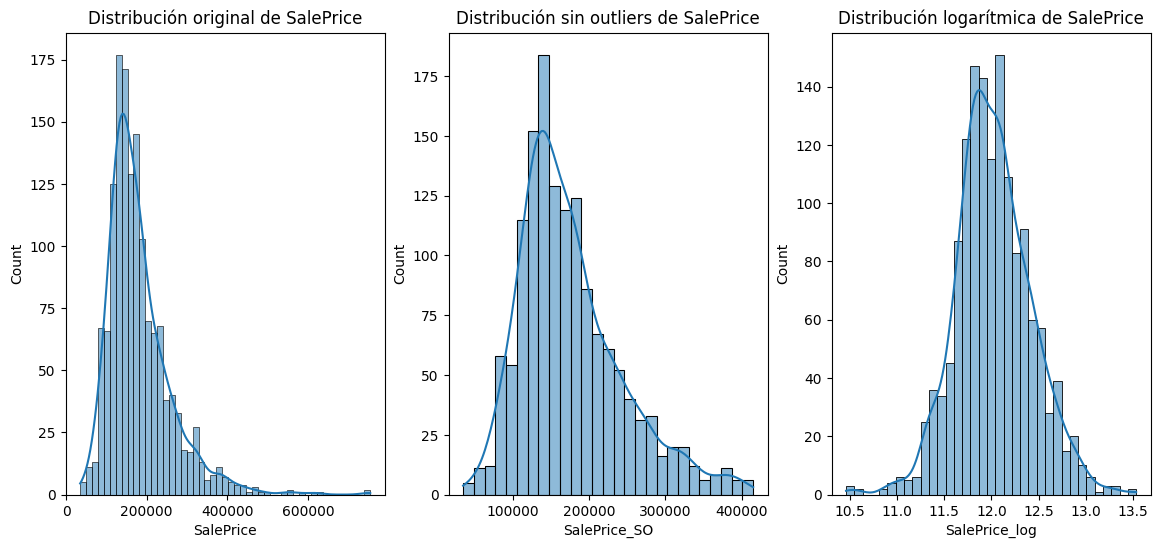

La distribución original de SalePrice presenta un sesgo positivo claro, con una notable cola larga hacia la derecha,
lo que indica la presencia de varios outliers, es decir, propiedades con precios mucho más elevados que la mayoría. En contraste, la distribución sin outliers
elimina estos valores extremos, lo que hace que la distribución sea más simétrica y que los datos se concentren alrededor de los valores medios, reduciendo la dispersión.
Finalmente, la distribución logarítmica, obtenida tras aplicar una transformación logarítmica, normaliza los datos, convirtiéndolos en una distribución mucho más
simétrica y cercana a la forma de una distribución normal. Esta transformación es útil porque puede mejorar la interpretación de los datos y optimizar el rendimiento
en algunos modelos de machine learning que asumen una distribución normal o simétrica en los datos.


In [219]:
print('Comparacion de variables antes y despues de el manejo de outliers y de transoframciones logaritmicas de los datos');
print('Columna SalePrice')

print(data[['SalePrice', 'SalePrice_SO', 'SalePrice_log']].head())

# Mostrar el gráfico para 'SalePrice'
plot_distribution(data['SalePrice'], data['SalePrice_SO'], data['SalePrice_log'], 'SalePrice')
print("""La distribución original de SalePrice presenta un sesgo positivo claro, con una notable cola larga hacia la derecha,
lo que indica la presencia de varios outliers, es decir, propiedades con precios mucho más elevados que la mayoría. En contraste, la distribución sin outliers
elimina estos valores extremos, lo que hace que la distribución sea más simétrica y que los datos se concentren alrededor de los valores medios, reduciendo la dispersión.
Finalmente, la distribución logarítmica, obtenida tras aplicar una transformación logarítmica, normaliza los datos, convirtiéndolos en una distribución mucho más
simétrica y cercana a la forma de una distribución normal. Esta transformación es útil porque puede mejorar la interpretación de los datos y optimizar el rendimiento
en algunos modelos de machine learning que asumen una distribución normal o simétrica en los datos.""")


Columna LotArea
   LotArea  LotArea_SO  LotArea_log
0     8450      8450.0     9.042040
1     9600      9600.0     9.169623
2    11250     11250.0     9.328212
3     9550      9550.0     9.164401
4    14260     14260.0     9.565284


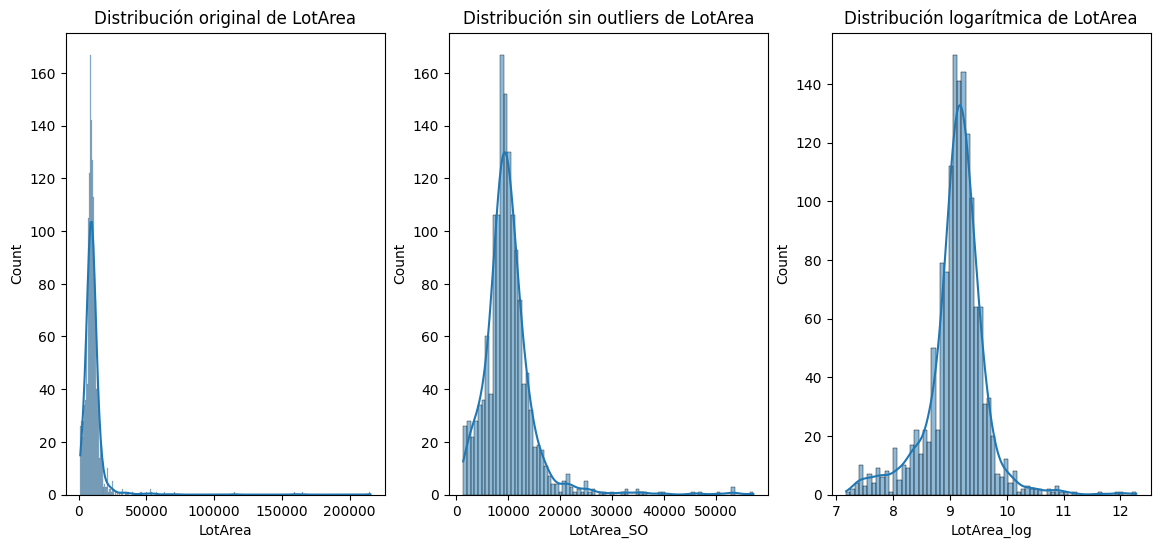

La distribución original de LotArea presenta un fuerte sesgo positivo, con una cola muy larga hacia la derecha debido a la presencia de outliers 
relacionados con lotes muy grandes. Al eliminar estos valores extremos en la distribución sin outliers, se reduce significativamente la longitud de la cola, 
haciendo que la distribución sea más compacta, aunque todavía mantiene un ligero sesgo. Por otro lado, la distribución logarítmica, obtenida tras aplicar una 
transformación logarítmica, normaliza los datos, volviéndolos mucho más simétricos y acercándolos a una distribución normal, lo cual es particularmente útil para 
modelos estadísticos y de machine learning.


In [222]:
print('Columna LotArea')

print(data[['LotArea', 'LotArea_SO', 'LotArea_log']].head())
plot_distribution(data['LotArea'], data['LotArea_SO'], data['LotArea_log'], 'LotArea')

print("""La distribución original de LotArea presenta un fuerte sesgo positivo, con una cola muy larga hacia la derecha debido a la presencia de outliers 
relacionados con lotes muy grandes. Al eliminar estos valores extremos en la distribución sin outliers, se reduce significativamente la longitud de la cola, 
haciendo que la distribución sea más compacta, aunque todavía mantiene un ligero sesgo. Por otro lado, la distribución logarítmica, obtenida tras aplicar una 
transformación logarítmica, normaliza los datos, volviéndolos mucho más simétricos y acercándolos a una distribución normal, lo cual es particularmente útil para 
modelos estadísticos y de machine learning.""")

Columna GrLivArea
   GrLivArea  GrLivArea_SO  GrLivArea_log
0       1710        1710.0       7.444833
1       1262        1262.0       7.141245
2       1786        1786.0       7.488294
3       1717        1717.0       7.448916
4       2198        2198.0       7.695758


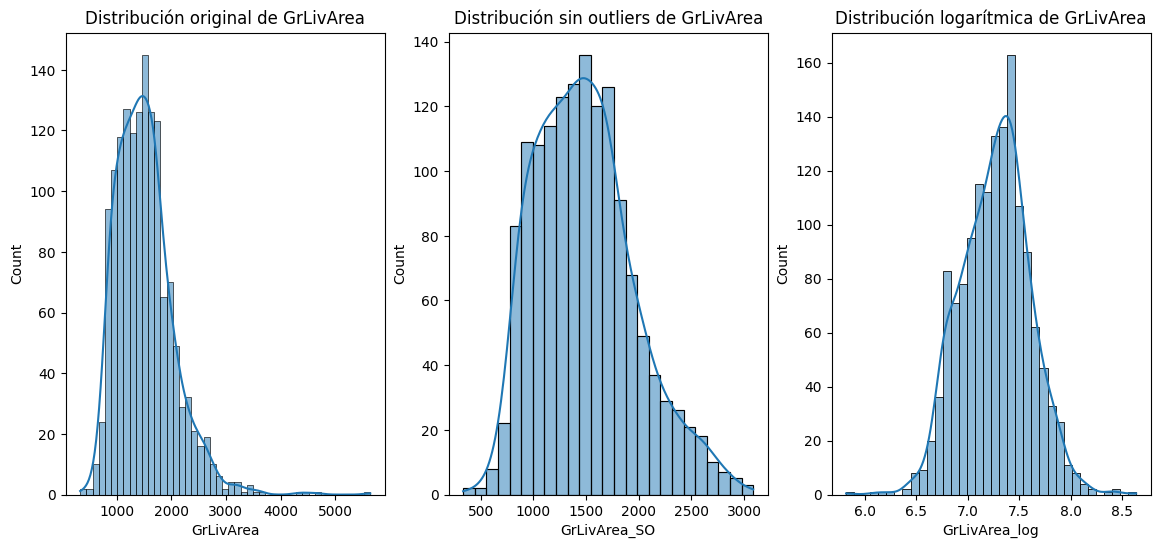

La distribución original de GrLivArea presenta un sesgo positivo moderado, con la mayoría de los valores concentrados entre 1,000 y 2,000, 
y una cola larga hacia la derecha que indica la presencia de outliers, es decir, viviendas con áreas mucho más grandes de lo habitual. 
Tras eliminar los outliers, la distribución se vuelve más simétrica, aunque aún mantiene un ligero sesgo positivo, con los datos concentrados principalmente 
entre 1,000 y 2,500, lo que permite un análisis más claro sin la distorsión causada por los valores extremos. Finalmente, la aplicación de una transformación 
logarítmica reduce el sesgo de manera significativa, normalizando los datos y volviendo la distribución mucho más simétrica y cercana a una distribución normal, 
lo cual es especialmente útil para modelos estadísticos y de machine learning que requieren datos con esta característica.
Columna OverallCond
   OverallCond  OverallCond_SO  OverallCond_log
0            5               5         1.791759
1     

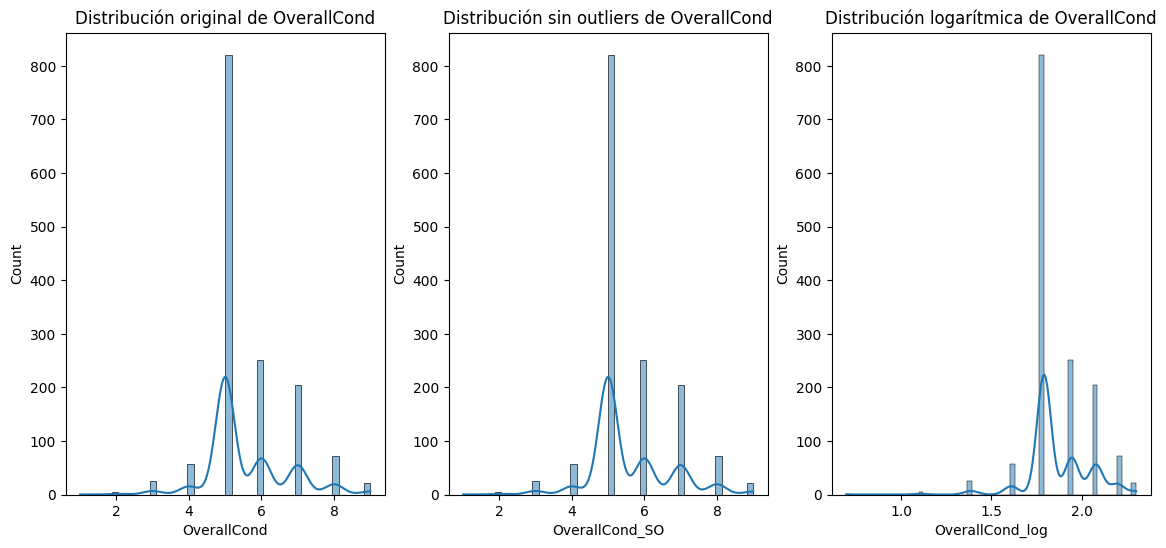

La distribución de OverallCond en su forma original muestra una fuerte concentración de valores en torno a 5, con un pico muy alto en esa categoría, 
mientras que los valores fuera de ese rango son poco frecuentes. Al eliminar los outliers, la distribución no cambia significativamente, ya que la mayoría de 
los valores están alrededor del mismo punto central. Sin embargo, la distribución logarítmica comprime los valores, lo que reduce aún más la influencia de los 
valores extremos, pero el patrón general permanece con una gran concentración alrededor de un valor central. A pesar de la transformación, la estructura de la 
distribución sigue siendo similar, con un pico muy pronunciado alrededor del valor más común.
Columna YearBuilt
   YearBuilt  YearBuilt_SO  YearBuilt_log
0       2003        2003.0       7.602900
1       1976        1976.0       7.589336
2       2001        2001.0       7.601902
3       1915        1915.0       7.557995
4       2000        2000.0       7.601402


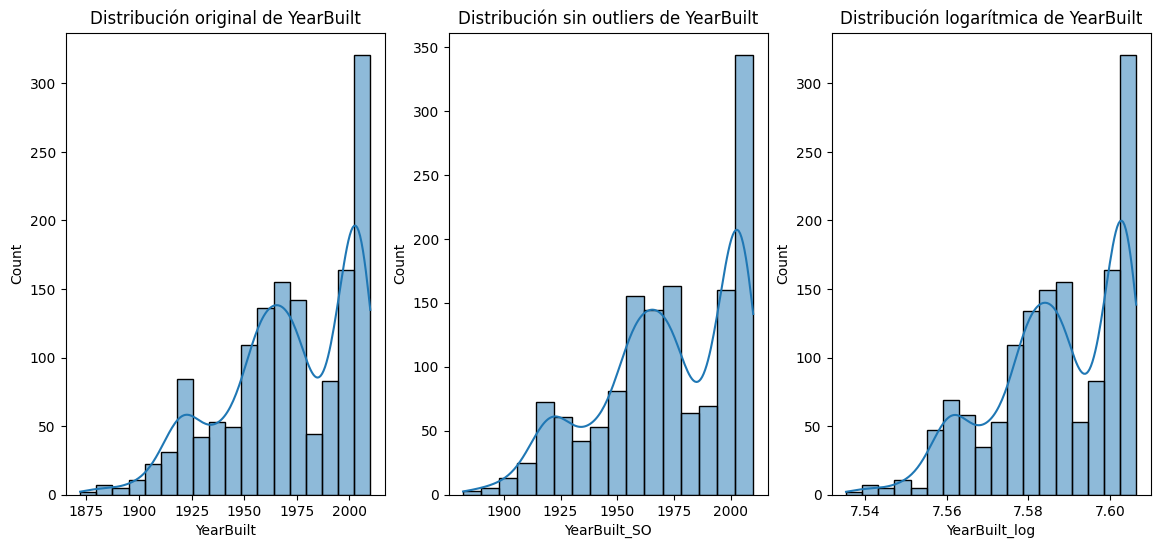

La distribución original de `YearBuilt` muestra una tendencia creciente, con un mayor número de construcciones en años recientes, especialmente después del año 2000. 
Al eliminar los outliers, la distribución no cambia mucho, ya que la mayoría de los valores siguen concentrados en los años recientes, lo que sugiere que los outliers no 
eran un factor significativo en esta variable. Sin embargo, tras la transformación logarítmica, la distribución se compacta ligeramente, pero conserva la misma tendencia 
ascendente, con los valores más altos concentrados después del año 2000. Esta transformación ayuda a normalizar la escala, pero el patrón general de los datos no varía 
demasiado.


In [224]:
print('Columna GrLivArea')
print(data[['GrLivArea', 'GrLivArea_SO','GrLivArea_log']].head())
plot_distribution(data['GrLivArea'], data['GrLivArea_SO'], data['GrLivArea_log'], 'GrLivArea')
print("""La distribución original de GrLivArea presenta un sesgo positivo moderado, con la mayoría de los valores concentrados entre 1,000 y 2,000, 
y una cola larga hacia la derecha que indica la presencia de outliers, es decir, viviendas con áreas mucho más grandes de lo habitual. 
Tras eliminar los outliers, la distribución se vuelve más simétrica, aunque aún mantiene un ligero sesgo positivo, con los datos concentrados principalmente 
entre 1,000 y 2,500, lo que permite un análisis más claro sin la distorsión causada por los valores extremos. Finalmente, la aplicación de una transformación 
logarítmica reduce el sesgo de manera significativa, normalizando los datos y volviendo la distribución mucho más simétrica y cercana a una distribución normal, 
lo cual es especialmente útil para modelos estadísticos y de machine learning que requieren datos con esta característica.""")


print('Columna OverallCond')
print(data[['OverallCond', 'OverallCond_SO','OverallCond_log']].head())
plot_distribution(data['OverallCond'], data['OverallCond_SO'], data['OverallCond_log'], 'OverallCond')
print("""La distribución de OverallCond en su forma original muestra una fuerte concentración de valores en torno a 5, con un pico muy alto en esa categoría, 
mientras que los valores fuera de ese rango son poco frecuentes. Al eliminar los outliers, la distribución no cambia significativamente, ya que la mayoría de 
los valores están alrededor del mismo punto central. Sin embargo, la distribución logarítmica comprime los valores, lo que reduce aún más la influencia de los 
valores extremos, pero el patrón general permanece con una gran concentración alrededor de un valor central. A pesar de la transformación, la estructura de la 
distribución sigue siendo similar, con un pico muy pronunciado alrededor del valor más común.""")

print('Columna YearBuilt')
print(data[['YearBuilt', 'YearBuilt_SO','YearBuilt_log']].head())
plot_distribution(data['YearBuilt'], data['YearBuilt_SO'], data['YearBuilt_log'], 'YearBuilt')
print("""La distribución original de `YearBuilt` muestra una tendencia creciente, con un mayor número de construcciones en años recientes, especialmente después del año 2000. 
Al eliminar los outliers, la distribución no cambia mucho, ya que la mayoría de los valores siguen concentrados en los años recientes, lo que sugiere que los outliers no 
eran un factor significativo en esta variable. Sin embargo, tras la transformación logarítmica, la distribución se compacta ligeramente, pero conserva la misma tendencia 
ascendente, con los valores más altos concentrados después del año 2000. Esta transformación ayuda a normalizar la escala, pero el patrón general de los datos no varía 
demasiado.""")



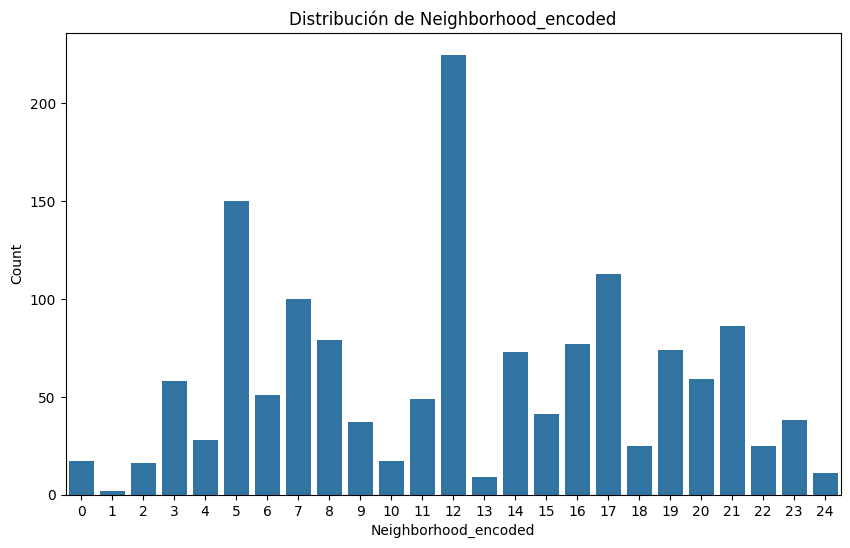

    Neighborhood  Neighborhood_encoded
219      Blmngtn                     0
599      Blueste                     1
225       BrDale                     2
9        BrkSide                     3
69       ClearCr                     4
0        CollgCr                     5
3        Crawfor                     6
39       Edwards                     7
50       Gilbert                     8
21        IDOTRR                     9
23       MeadowV                    10
5        Mitchel                    11
14         NAmes                    12
126      NPkVill                    13
7         NWAmes                    14
4        NoRidge                    15
11       NridgHt                    16
8        OldTown                    17
267        SWISU                    18
10        Sawyer                    19
18       SawyerW                    20
6        Somerst                    21
58       StoneBr                    22
41        Timber                    23
1        Veenker         

In [229]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Neighborhood_encoded', data=data)

# Título y etiquetas
plt.title('Distribución de Neighborhood_encoded')
plt.xlabel('Neighborhood_encoded')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()
label_encoder = LabelEncoder()
data['Neighborhood_encoded'] = label_encoder.fit_transform(data['Neighborhood'])

# Crear un DataFrame para mostrar la correspondencia
mapping = pd.DataFrame({'Neighborhood': data['Neighborhood'], 'Neighborhood_encoded': data['Neighborhood_encoded']})

# Eliminar duplicados para mostrar solo las correspondencias únicas
mapping_unique = mapping.drop_duplicates().sort_values(by='Neighborhood_encoded')

# Mostrar la relación entre los nombres originales y los valores codificados
print(mapping_unique)

print('Aca podemos observar la variable Neighboorhood que fue la que codificamos por etiquetas numericas, en la grafica podemos observar la distribucion de los \ndatos y en la tabla podemos observar la correspondencia de los datos originales con los codificados')